In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# A_sold = '97201-sold-6m.csv'
# B_sold = '97202-sold-6m.csv'

In [3]:
# A_sold = pd.read_csv(A_sold)
# B_sold = pd.read_csv(B_sold)

In [4]:
# sold_home_data = pd.merge(A_sold, B_sold, how="outer")
# sold_home_data.head(15)

In [5]:
# import glob
# import os
# os.chdir("Final-Project/Bryan/Download_Files")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
sold_home_data = 'combined_csv.csv'
sold_df = pd.read_csv(sold_home_data)
sold_df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,July-24-2020,Single Family Residential,633 SW Sherman St,Portland,OR,97201,403000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/OR/Portland/633-S-Sherma...,RMLS,20314749.0,N,Y,45.506872,-122.685052
1,PAST SALE,May-27-2020,Single Family Residential,7811 SE Morrison St,Portland,OR,97215,571000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/OR/Portland/7811-SE-Morr...,RMLS,20002603.0,N,Y,45.516999,-122.582883
2,PAST SALE,June-16-2020,Single Family Residential,2115 SE Stark St,Portland,OR,97214,475000.0,2.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/OR/Portland/2115-SE-Star...,RMLS,20306085.0,N,Y,45.519520,-122.644252
3,PAST SALE,NaN,Single Family Residential,19 SW Pennoyer St Unit A,Portland,OR,97239,525000.0,3.0,2.5,...,NaN,NaN,NaN,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,NaN,N,Y,45.497421,-122.678405
4,PAST SALE,March-5-2020,Single Family Residential,3529 N Missouri Ave,Portland,OR,97227,414000.0,2.0,1.0,...,Sold,NaN,NaN,http://www.redfin.com/OR/Portland/3529-N-Misso...,RMLS,19296623.0,N,Y,45.548305,-122.677918


# Data Cleaning

In [7]:
#Getting rid of columns that are not needed so data are more easily viewed. 
del sold_df['SALE TYPE']
del sold_df['PROPERTY TYPE']
del sold_df['STATE OR PROVINCE']
del sold_df['STATUS']
del sold_df['SOURCE']
del sold_df['NEXT OPEN HOUSE START TIME']
del sold_df['NEXT OPEN HOUSE END TIME']
del sold_df['FAVORITE']
del sold_df['INTERESTED']
sold_df.head()

,SOLD DATE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE
0,July-24-2020,633 SW Sherman St,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,27.0,138.0,NaN,http://www.redfin.com/OR/Portland/633-S-Sherma...,20314749.0,45.506872,-122.685052
1,May-27-2020,7811 SE Morrison St,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,85.0,284.0,NaN,http://www.redfin.com/OR/Portland/7811-SE-Morr...,20002603.0,45.516999,-122.582883
2,June-16-2020,2115 SE Stark St,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,65.0,249.0,NaN,http://www.redfin.com/OR/Portland/2115-SE-Star...,20306085.0,45.519520,-122.644252
3,NaN,19 SW Pennoyer St Unit A,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,NaN,341.0,NaN,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,45.497421,-122.678405
4,March-5-2020,3529 N Missouri Ave,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,168.0,244.0,NaN,http://www.redfin.com/OR/Portland/3529-N-Misso...,19296623.0,45.548305,-122.677918


In [8]:
#Reviewing data types. 
dataTypeSeries = sold_df.dtypes
print(dataTypeSeries)

SOLD DATE                                                                                      object
ADDRESS                                                                                        object
CITY                                                                                           object
ZIP OR POSTAL CODE                                                                              int64
PRICE                                                                                         float64
BEDS                                                                                          float64
BATHS                                                                                         float64
LOCATION                                                                                       object
SQUARE FEET                                                                                   float64
LOT SIZE                                                                          

In [9]:
#Converting data types.
sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']] = sold_df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']].apply(pd.to_numeric)
print(sold_df.dtypes)

SOLD DATE                                                                                      object
ADDRESS                                                                                        object
CITY                                                                                           object
ZIP OR POSTAL CODE                                                                              int64
PRICE                                                                                         float64
BEDS                                                                                          float64
BATHS                                                                                         float64
LOCATION                                                                                       object
SQUARE FEET                                                                                   float64
LOT SIZE                                                                          

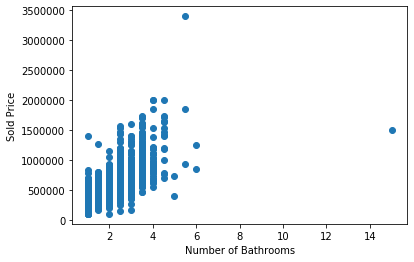

In [10]:
#Inspecting the data.  I can see there are outliers in price and number of bathrooms. 
bathrooms = sold_df['BATHS']
cost = sold_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sold Price")
plt.show()

In [11]:
sold_df["SPLIT_ADDRESS"] = sold_df["ADDRESS"]
sold_df.head()

,SOLD DATE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,SPLIT_ADDRESS
0,July-24-2020,633 SW Sherman St,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,27.0,138.0,NaN,http://www.redfin.com/OR/Portland/633-S-Sherma...,20314749.0,45.506872,-122.685052,633 SW Sherman St
1,May-27-2020,7811 SE Morrison St,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,85.0,284.0,NaN,http://www.redfin.com/OR/Portland/7811-SE-Morr...,20002603.0,45.516999,-122.582883,7811 SE Morrison St
2,June-16-2020,2115 SE Stark St,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,65.0,249.0,NaN,http://www.redfin.com/OR/Portland/2115-SE-Star...,20306085.0,45.519520,-122.644252,2115 SE Stark St
3,NaN,19 SW Pennoyer St Unit A,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,NaN,341.0,NaN,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,45.497421,-122.678405,19 SW Pennoyer St Unit A
4,March-5-2020,3529 N Missouri Ave,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,168.0,244.0,NaN,http://www.redfin.com/OR/Portland/3529-N-Misso...,19296623.0,45.548305,-122.677918,3529 N Missouri Ave


In [12]:
#Changing the index to address. 
address_df = sold_df.set_index('ADDRESS')
address_df.head()

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,SPLIT_ADDRESS
ADDRESS,,,,,,,,,,,,,,,,,,
633 SW Sherman St,July-24-2020,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,27.0,138.0,NaN,http://www.redfin.com/OR/Portland/633-S-Sherma...,20314749.0,45.506872,-122.685052,633 SW Sherman St
7811 SE Morrison St,May-27-2020,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,85.0,284.0,NaN,http://www.redfin.com/OR/Portland/7811-SE-Morr...,20002603.0,45.516999,-122.582883,7811 SE Morrison St
2115 SE Stark St,June-16-2020,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,65.0,249.0,NaN,http://www.redfin.com/OR/Portland/2115-SE-Star...,20306085.0,45.519520,-122.644252,2115 SE Stark St
19 SW Pennoyer St Unit A,NaN,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,NaN,341.0,NaN,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,45.497421,-122.678405,19 SW Pennoyer St Unit A
3529 N Missouri Ave,March-5-2020,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,168.0,244.0,NaN,http://www.redfin.com/OR/Portland/3529-N-Misso...,19296623.0,45.548305,-122.677918,3529 N Missouri Ave


In [13]:
#Dropping the outliers. 2681 was expensive. 1906 was multifamily. 8415 had incorrect square footage.
filtered_df = address_df.drop(['2681 SW Buena Vista Dr', '1906 SE 72nd Ave', '8415 SE Schwind Cir'])
filtered_df.head()

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,SPLIT_ADDRESS
ADDRESS,,,,,,,,,,,,,,,,,,
633 SW Sherman St,July-24-2020,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,27.0,138.0,NaN,http://www.redfin.com/OR/Portland/633-S-Sherma...,20314749.0,45.506872,-122.685052,633 SW Sherman St
7811 SE Morrison St,May-27-2020,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,85.0,284.0,NaN,http://www.redfin.com/OR/Portland/7811-SE-Morr...,20002603.0,45.516999,-122.582883,7811 SE Morrison St
2115 SE Stark St,June-16-2020,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,65.0,249.0,NaN,http://www.redfin.com/OR/Portland/2115-SE-Star...,20306085.0,45.519520,-122.644252,2115 SE Stark St
19 SW Pennoyer St Unit A,NaN,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,NaN,341.0,NaN,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,45.497421,-122.678405,19 SW Pennoyer St Unit A
3529 N Missouri Ave,March-5-2020,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,168.0,244.0,NaN,http://www.redfin.com/OR/Portland/3529-N-Misso...,19296623.0,45.548305,-122.677918,3529 N Missouri Ave


# Data Exploration

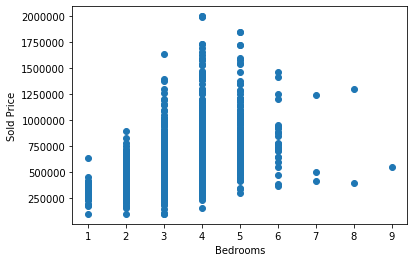

In [14]:
bedrooms = filtered_df['BEDS']
cost = filtered_df['PRICE']
plt.scatter(bedrooms, cost)
plt.xlabel("Bedrooms")
plt.ylabel("Sold Price")
plt.show()

In [15]:
#Created a centrality variable based on coordinates of Wells Fargo tower (tallest PDX building)
filtered_df['BATHS_PER_BED'] = (filtered_df['BATHS']/filtered_df['BEDS'])
central_lat_calc = (45.5142-(filtered_df['LATITUDE']))
central_lon_calc = (-122.6779-(filtered_df['LONGITUDE']))
filtered_df['CENTRAL_LAT_CALC'] = central_lat_calc.abs()
filtered_df['CENTRAL_LON_CALC'] = central_lon_calc.abs()
filtered_df['CENTRALITY'] = (filtered_df['CENTRAL_LAT_CALC']+filtered_df['CENTRAL_LON_CALC']) 
filtered_df['YARD SIZE'] = (filtered_df['LOT SIZE']-filtered_df['SQUARE FEET'])
filtered_df.head(20)

/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,...,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,SPLIT_ADDRESS,BATHS_PER_BED,CENTRAL_LAT_CALC,CENTRAL_LON_CALC,CENTRALITY,YARD SIZE
ADDRESS,,,,,,,,,,,,,,,,,,,,,
633 SW Sherman St,July-24-2020,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,...,http://www.redfin.com/OR/Portland/633-S-Sherma...,20314749.0,45.506872,-122.685052,633 SW Sherman St,0.666667,0.007328,0.007152,0.014480,556.0
7811 SE Morrison St,May-27-2020,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,...,http://www.redfin.com/OR/Portland/7811-SE-Morr...,20002603.0,45.516999,-122.582883,7811 SE Morrison St,0.666667,0.002799,0.095017,0.097816,3219.0
2115 SE Stark St,June-16-2020,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,...,http://www.redfin.com/OR/Portland/2115-SE-Star...,20306085.0,45.519520,-122.644252,2115 SE Stark St,1.250000,0.005319,0.033648,0.038968,1142.0
19 SW Pennoyer St Unit A,NaN,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,...,http://www.redfin.com/OR/Portland/19-SW-Pennoy...,NaN,45.497421,-122.678405,19 SW Pennoyer St Unit A,0.833333,0.016779,0.000505,0.017285,633.0
3529 N Missouri Ave,March-5-2020,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,...,http://www.redfin.com/OR/Portland/3529-N-Misso...,19296623.0,45.548305,-122.677918,3529 N Missouri Ave,0.500000,0.034105,0.000018,0.034123,484.0
1104 SE 52nd Ave,NaN,Portland,97215,800000.0,3.0,1.5,NaN,2189.0,7440.0,1886.0,...,http://www.redfin.com/OR/Portland/1104-SE-52nd...,NaN,45.515216,-122.609038,1104 SE 52nd Ave,0.500000,0.001016,0.068862,0.069878,5251.0
2122 SW 18th Ave,March-25-2020,Portland,97201,862000.0,3.0,3.5,PORTLAND HEIGHTS,2877.0,3049.0,1886.0,...,http://www.redfin.com/OR/Portland/2122-SW-18th...,20031197.0,45.511039,-122.695797,2122 SW 18th Ave,1.166667,0.003161,0.017897,0.021057,172.0
3638 S Corbett Ave,NaN,Portland,97239,303000.0,2.0,1.0,NaN,1018.0,2289.0,1888.0,...,http://www.redfin.com/OR/Portland/3638-S-Corbe...,NaN,45.496625,-122.675665,3638 S Corbett Ave,0.500000,0.017575,0.002235,0.019809,1271.0
4536 SE Boise St,May-22-2020,Portland,97206,460000.0,2.0,1.0,CRESTON - KENILWORTH,1592.0,4791.0,1889.0,...,http://www.redfin.com/OR/Portland/4536-SE-Bois...,20069666.0,45.492554,-122.615066,4536 SE Boise St,0.500000,0.021646,0.062834,0.084479,3199.0


In [16]:
#Created another centrality variable based on coordinates of largest employer (OHSU)
ohsu_lat_calc = (45.499207773346-(filtered_df['LATITUDE']))
ohsu_lon_calc = (-122.68587113472-(filtered_df['LONGITUDE']))
filtered_df['OHSU_LAT_CALC'] = ohsu_lat_calc.abs()
filtered_df['OHSU_LON_CALC'] = ohsu_lon_calc.abs()
filtered_df['OHSU_CENTRALITY'] = (filtered_df['OHSU_LAT_CALC']+filtered_df['OHSU_LON_CALC']) 

/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [17]:
#Another centrality variable based on Pittock mansion (a point in the largest city park)
pit_lat_calc = (45.5252-(filtered_df['LATITUDE']))
pit_lon_calc = (-122.7163-(filtered_df['LONGITUDE']))
filtered_df['PIT_LAT_CALC'] = pit_lat_calc.abs()
filtered_df['PIT_LON_CALC'] = pit_lon_calc.abs()
filtered_df['PIT_CENTRALITY'] = (filtered_df['PIT_LAT_CALC']+filtered_df['PIT_LON_CALC']) 

/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [18]:
#Creating a yard size variable. 
filtered_df['YARD SIZE'] = (filtered_df['LOT SIZE']-filtered_df['SQUARE FEET'])

/Users/bryanloy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Creating a bathrooms per bedroom ratio variable. 
baths_per_bed = (filtered_df['BATHS']/filtered_df['BEDS'])

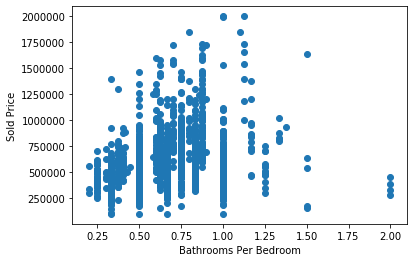

In [20]:
cost = filtered_df['PRICE']
plt.scatter(baths_per_bed, cost)
plt.xlabel("Bathrooms Per Bedroom")
plt.ylabel("Sold Price")
plt.show()

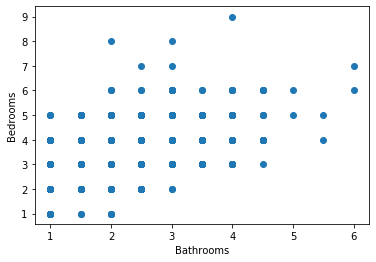

In [21]:
bathrooms = filtered_df['BATHS']
bedrooms = filtered_df['BEDS']
plt.scatter(bathrooms, bedrooms)
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

In [22]:
# bathrooms = filtered_df['BATHS']
# size = filtered_df['SQUARE FEET']
# plt.scatter(bathrooms, size)
# plt.xlabel("Bathrooms")
# plt.ylabel("Square Feet")
# plt.show()

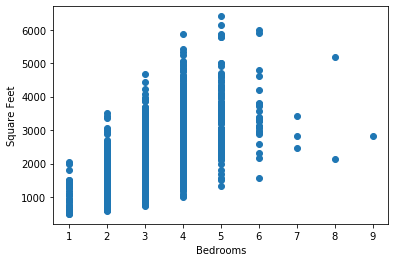

In [23]:
bedrooms = filtered_df['BEDS']
size = filtered_df['SQUARE FEET']
plt.scatter(bedrooms, size)
plt.xlabel("Bedrooms")
plt.ylabel("Square Feet")
plt.show()

In [24]:
#Splitting address to create a "side street" variable. 
address_df = filtered_df["SPLIT_ADDRESS"].str.split(" ", n = 3, expand = True) 

address_df.head()

,0,1,2,3
ADDRESS,,,,
633 SW Sherman St,633,SW,Sherman,St
7811 SE Morrison St,7811,SE,Morrison,St
2115 SE Stark St,2115,SE,Stark,St
19 SW Pennoyer St Unit A,19,SW,Pennoyer,St Unit A
3529 N Missouri Ave,3529,N,Missouri,Ave


In [25]:
#Adding address variables to filtered dataframe. 
filtered_df["House Number"]= address_df[0] 
filtered_df["Quadrant"]= address_df[1]
filtered_df["Road Name"]= address_df[2]  
filtered_df["Road Type"]= address_df[3]

filtered_df.head()

,SOLD DATE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,...,OHSU_LAT_CALC,OHSU_LON_CALC,OHSU_CENTRALITY,PIT_LAT_CALC,PIT_LON_CALC,PIT_CENTRALITY,House Number,Quadrant,Road Name,Road Type
ADDRESS,,,,,,,,,,,,,,,,,,,,,
633 SW Sherman St,July-24-2020,Portland,97201,403000.0,3.0,2.0,"Portland West, Raleigh Hills",2928.0,3484.0,1880.0,...,0.007664,0.000819,0.008483,0.018328,0.031248,0.049576,633,SW,Sherman,St
7811 SE Morrison St,May-27-2020,Portland,97215,571000.0,3.0,2.0,MONTAVILLA / MT TABOR,2008.0,5227.0,1882.0,...,0.017791,0.102988,0.120779,0.008201,0.133417,0.141618,7811,SE,Morrison,St
2115 SE Stark St,June-16-2020,Portland,97214,475000.0,2.0,2.5,BUCKMAN,1907.0,3049.0,1883.0,...,0.020312,0.041619,0.061931,0.005680,0.072048,0.077729,2115,SE,Stark,St
19 SW Pennoyer St Unit A,NaN,Portland,97239,525000.0,3.0,2.5,NaN,1539.0,2172.0,1884.0,...,0.001787,0.007466,0.009253,0.027779,0.037895,0.065674,19,SW,Pennoyer,St Unit A
3529 N Missouri Ave,March-5-2020,Portland,97227,414000.0,2.0,1.0,Portland North,1694.0,2178.0,1886.0,...,0.049097,0.007953,0.057050,0.023105,0.038382,0.061487,3529,N,Missouri,Ave


In [26]:
#Combining eastside and westside "quandrants" into two variables for simplification.  
filtered_df = pd.get_dummies(filtered_df, columns=["Quadrant"])
filtered_df["Eastside"] = (filtered_df["Quadrant_N"] + filtered_df["Quadrant_SE"] + filtered_df["Quadrant_NE"] + filtered_df["Quadrant_E"])
filtered_df["Westside"] = (filtered_df["Quadrant_S"] + filtered_df["Quadrant_SW"] + filtered_df["Quadrant_NW"])
filtered_df.columns

Index(['SOLD DATE', 'CITY', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'SPLIT_ADDRESS', 'BATHS_PER_BED',
       'CENTRAL_LAT_CALC', 'CENTRAL_LON_CALC', 'CENTRALITY', 'YARD SIZE',
       'OHSU_LAT_CALC', 'OHSU_LON_CALC', 'OHSU_CENTRALITY', 'PIT_LAT_CALC',
       'PIT_LON_CALC', 'PIT_CENTRALITY', 'House Number', 'Road Name',
       'Road Type', 'Quadrant_E', 'Quadrant_N', 'Quadrant_NE', 'Quadrant_NW',
       'Quadrant_S', 'Quadrant_SE', 'Quadrant_SW', 'Eastside', 'Westside'],
      dtype='object')

In [86]:
#Finding which streets are numeric vs non-numeric for side-street variable. 
#Cesar Chavez is example.  Named even though it is 39th and runs North-South. 
road_split = list(map(lambda i: i[ : -2], filtered_df["Road Name"]))
filtered_df["Road Cat"] = road_split

s1 = filtered_df["Road Cat"]
#filtered_df["Side Street"] = s1.str.isnumeric()
s1.str.isnumeric()

#filtered_df["Side Street"] = s1
#filtered_df.columns
#filtered_df = pd.get_dummies(filtered_df, columns=["Road Cat"])
filtered_df.columns

Index(['SOLD DATE', 'CITY', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       ...
       'Road Cat_Woodsi', 'Road Cat_Woodsto', 'Road Cat_Woodwa',
       'Road Cat_Wools', 'Road Cat_Wyga', 'Road Cat_Ya', 'Road Cat_Yamhi',
       'Road Cat_Yuk', 'Road Cat_Ziegl', 'Road Cat'],
      dtype='object', length=1677)

In [28]:
#Altering data type of date so I can consider it as a variable. But this is no good because seller doesn't "know" 
#the date in advance.
# sold_date_df = filtered_df["SOLD DATE"].str.split("-", n = 2, expand = True)
# sold_date_df.head()

# filtered_df["Month Sold"]= sold_date_df[0] 
# filtered_df["Date Sold"]= sold_date_df[1]
# filtered_df["Year Sold"]= sold_date_df[2]  

# filtered_df.head()


# Model Variable Relationships with Price

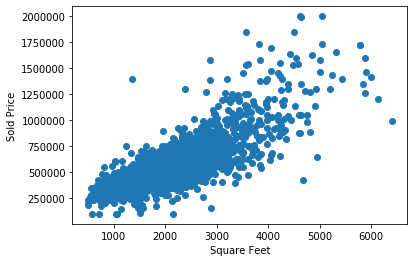

In [29]:
size = filtered_df['SQUARE FEET']
cost = filtered_df['PRICE']
plt.scatter(size, cost)
plt.xlabel("Square Feet")
plt.ylabel("Sold Price")
plt.show()

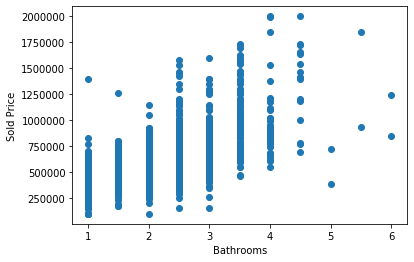

In [30]:
bathrooms = filtered_df['BATHS']
cost = filtered_df['PRICE']
plt.scatter(bathrooms, cost)
plt.xlabel("Bathrooms")
plt.ylabel("Sold Price")
plt.show()

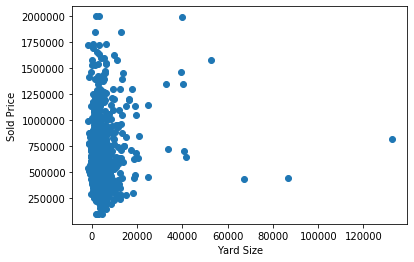

In [31]:
yard = filtered_df['YARD SIZE']
cost = filtered_df['PRICE']
plt.scatter(yard, cost)
plt.xlabel("Yard Size")
plt.ylabel("Sold Price")
plt.show()

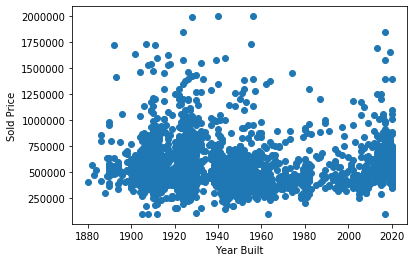

In [32]:
birthday = filtered_df['YEAR BUILT']
cost = filtered_df['PRICE']
plt.scatter(birthday, cost)
plt.xlabel("Year Built")
plt.ylabel("Sold Price")
plt.show()

In [33]:
filtered_df['YEAR BUILT'].describe()

count    2554.000000
mean     1942.883712
std        34.080987
min      1880.000000
25%      1919.000000
50%      1930.000000
75%      1955.000000
max      2020.000000
Name: YEAR BUILT, dtype: float64

In [61]:
split_years = pd.cut((filtered_df['YEAR BUILT']), 3)
filtered_df["YEAR BUILT CATEGORY"] = split_years
filtered_df.head()

#data = filtered_df.copy()
#data_binary_encoded = pd.get_dummies(filtered_df, columns=["YEAR BUILT CATEGORY"])
#data_binary_encoded.head(15)

filtered_df = pd.get_dummies(filtered_df, columns=["YEAR BUILT CATEGORY"])
filtered_df.columns
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1860.841, 1914.0]': 'YEAR_CAT_1'})
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1914.0, 1967.0]': 'YEAR_CAT_2'})
#filtered_df.rename(columns = {'YEAR BUILT CATEGORY_(1967.0, 2020.0]': 'YEAR_CAT_3'})

Index(['SOLD DATE', 'CITY', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'SPLIT_ADDRESS', 'BATHS_PER_BED',
       'CENTRAL_LAT_CALC', 'CENTRAL_LON_CALC', 'CENTRALITY', 'YARD SIZE',
       'OHSU_LAT_CALC', 'OHSU_LON_CALC', 'OHSU_CENTRALITY', 'PIT_LAT_CALC',
       'PIT_LON_CALC', 'PIT_CENTRALITY', 'House Number', 'Road Name',
       'Road Type', 'Quadrant_E', 'Quadrant_N', 'Quadrant_NE', 'Quadrant_NW',
       'Quadrant_S', 'Quadrant_SE', 'Quadrant_SW', 'Eastside', 'Westside',
       'YEAR BUILT CATEGORY_(1879.86, 1926.667]',
       'YEAR BUILT CATEGORY_(1926.667, 1973.333]',
       'YEAR BUILT CATEGORY_(1973.333, 2020.0]',
       'YEAR BUILT CATEGORY_(1879.86, 1950.0]',
       'YEAR BUILT CATEGORY_(1950.0, 2020.0]',
       'YEAR BUI

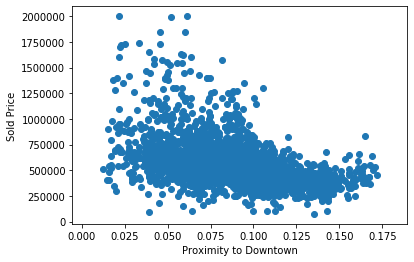

In [35]:
dt_location = filtered_df['CENTRALITY']
cost = filtered_df['PRICE']
plt.scatter(dt_location, cost)
plt.xlabel("Proximity to Downtown")
plt.ylabel("Sold Price")
plt.show()

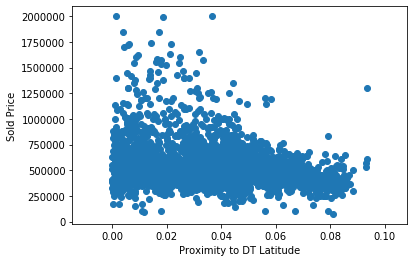

In [36]:
lat_location = filtered_df['CENTRAL_LAT_CALC']
cost = filtered_df['PRICE']
plt.scatter(lat_location, cost)
plt.xlabel("Proximity to DT Latitude")
plt.ylabel("Sold Price")
plt.show()

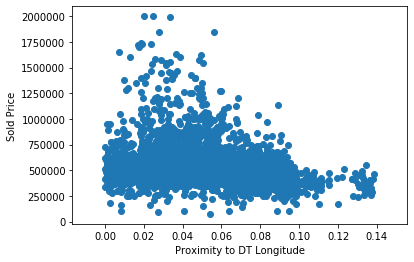

In [37]:
lon_location = filtered_df['CENTRAL_LON_CALC']
cost = filtered_df['PRICE']
plt.scatter(lon_location, cost)
plt.xlabel("Proximity to DT Longitude")
plt.ylabel("Sold Price")
plt.show()

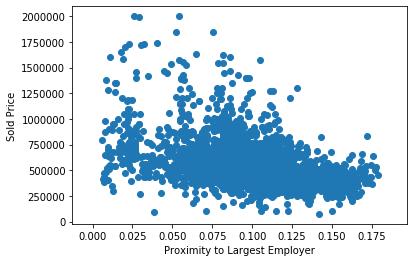

In [38]:
ohsu_location = filtered_df['OHSU_CENTRALITY']
cost = filtered_df['PRICE']
plt.scatter(ohsu_location, cost)
plt.xlabel("Proximity to Largest Employer")
plt.ylabel("Sold Price")
plt.show()

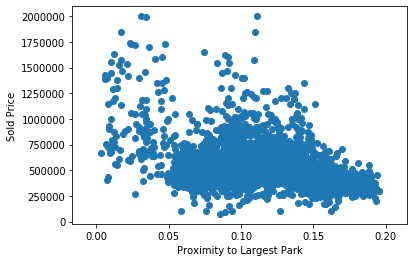

In [39]:
park_location = filtered_df['PIT_CENTRALITY']
cost = filtered_df['PRICE']
plt.scatter(park_location, cost)
plt.xlabel("Proximity to Largest Park")
plt.ylabel("Sold Price")
plt.show()

In [40]:
# landsize = filtered_df['LOT SIZE']
# cost = filtered_df['PRICE']
# plt.scatter(landsize, cost)
# plt.xlabel("Square Feet of Property")
# plt.ylabel("Sold Price")
# plt.show()

In [41]:
# landsize = filtered_df['LOT SIZE']
# size = filtered_df['SQUARE FEET']
# plt.scatter(landsize, size)
# plt.xlabel("Square Feet of Property")
# plt.ylabel("Square Feet of Home")
# plt.show()

In [42]:
# location = filtered_df['ZIP OR POSTAL CODE']
# cost = filtered_df['PRICE']
# plt.scatter(location, cost)
# plt.xlabel("Zip Code")
# plt.ylabel("Sold Price")
# plt.show()

In [43]:
# marketdays = filtered_df['DAYS ON MARKET']
# cost = filtered_df['PRICE']
# plt.scatter(marketdays, cost)
# plt.xlabel("Days on Market")
# plt.ylabel("Sold Price")
# plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [87]:
selectVariables_df = filtered_df[["PRICE", "BATHS", "SQUARE FEET", "YARD SIZE", "CENTRALITY", "YEAR BUILT", "House Number", "Westside", "Road Cat"]]
regression_df = selectVariables_df.dropna()

In [46]:
# data = x.copy()

# data_binary_encoded = pd.get_dummies(data, columns=["ZIP OR POSTAL CODE"])
# data_binary_encoded.head()

In [88]:
#x = regression_df[["BATHS", "SQUARE FEET", "YARD SIZE", "YEAR BUILT", "ZIP OR POSTAL CODE_97201", "ZIP OR POSTAL CODE_97202", "ZIP OR POSTAL CODE_97203", "ZIP OR POSTAL CODE_97210", "ZIP OR POSTAL CODE_97211", "ZIP OR POSTAL CODE_97216", "ZIP OR POSTAL CODE_97217", "ZIP OR POSTAL CODE_97218", "ZIP OR POSTAL CODE_97239"]]
x = regression_df[["BATHS", "SQUARE FEET", "YARD SIZE", "CENTRALITY", "YEAR BUILT", "Westside", "Road Cat"]]
y = regression_df[["PRICE"]]

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: could not convert string to float: 'Lambe'

In [91]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

ValueError: could not convert string to float: 'Lambe'

In [92]:
model.fit(x_train_scaled, y_train_scaled)
training_score = model.score(x_train_scaled, y_train_scaled)
print(f"Training Score: {training_score}")

Training Score: 0.7001645935095532


In [93]:
testing_score = model.score(x_test_scaled, y_test_scaled)
print(f"Testing Score: {testing_score}")

Testing Score: 0.7298608086411893


In [94]:
reg_scaled = LinearRegression().fit(x_test_scaled, y_test_scaled)
reg_scaled.coef_

array([[ 0.19061001,  0.62993314,  0.00423629, -0.1438142 ,  0.025255  ,
         0.04613305]])

In [54]:
reg_scaled.intercept_

array([-0.01105473])

In [55]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.7001645935095531


In [56]:
testing_score = model.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.7298608086411937


In [57]:
reg = LinearRegression().fit(x_test, y_test)
reg.coef_

array([[ 5.33693614e+04,  1.68214767e+02,  2.12540102e-01,
        -1.07879348e+06,  1.77787905e+02,  3.98678079e+04]])

In [58]:
reg.intercept_

array([-153116.03516434])

In [141]:
bath_entry = 4
bed_entry = 4
square_feet_entry = 3200
lot_size_entry = 3500
year_built_entry = 1920
latitude_entry = 45.499533
longitude_entry = -122.675113

In [142]:
new_value =  5225994.17912154 + (bath_entry *(-4.95047667e+01)) + (bed_entry *(-1.40636142e+02)) + (square_feet_entry *(3.30270090e+02)) + (lot_size_entry *(-1.28472388e+01)) + (year_built_entry * (-2.66515365e+03)) + (latitude_entry * (-5.59071838e-01)) + (longitude_entry * (1.50063912e+00)) 
print(f"Based on the entered parameters, the home is worth the following: ${new_value}")

Based on the entered parameters, the home is worth the following: $1119828.0311055772
